# Underfitting vs. Overfitting

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

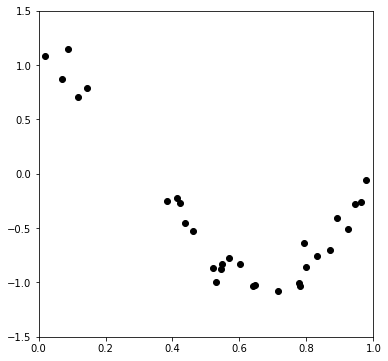

In [3]:
# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

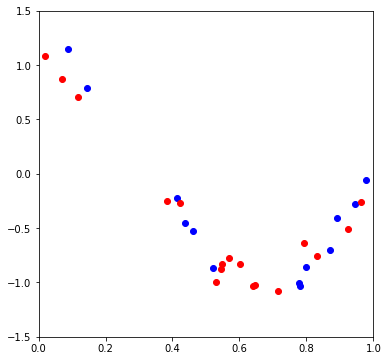

In [4]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

0.5110514312446298
0.18163869287051138


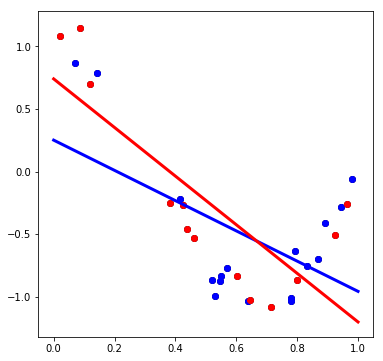

-7134944904323.548
-122075.84283125738


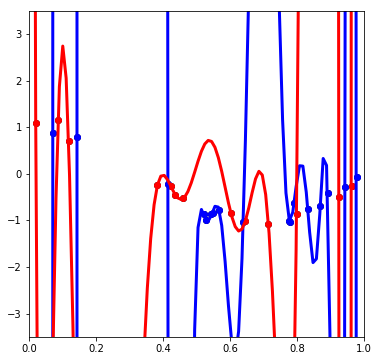

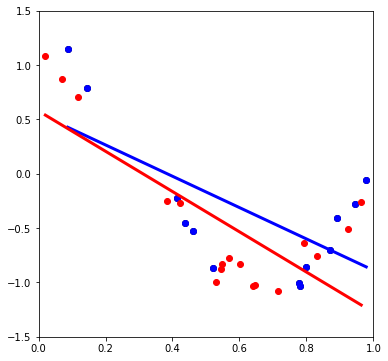

In [29]:
model1 = linear_model.LinearRegression()
x1=np.vstack(X1)
model1.fit(x1, y1)

model2 = linear_model.LinearRegression()
x2=np.vstack(X2)
model2.fit(x2, y2)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(x1, y1,  color='black')
plt.plot(x1, model1.predict(x1), color='blue',linewidth=3)
plt.plot(x2, model2.predict(x2), color='red',linewidth=3)

plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)


plt.show()

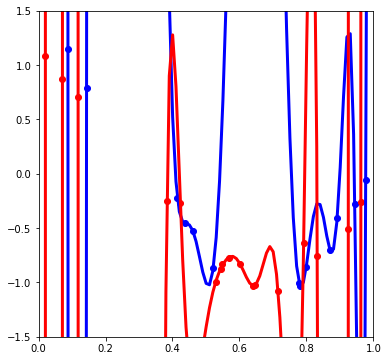

In [30]:

plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
axes.set_xlim([0,1])


model3 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model3.fit(x1, y1)
plt.scatter(x1, y1,  color='blue')
x_plot = np.vstack(np.linspace(0, 10, 1000))
plt.plot(x_plot, model3.predict(x_plot), color='blue',linewidth=3)


model2x2 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model2x2.fit(x2, y2)
plt.scatter(x2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 10, 1000))
plt.plot(x_plot, model2x2.predict(x_plot), color='red',linewidth=3)
plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


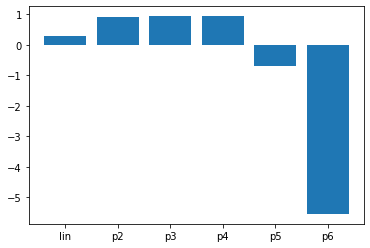

In [70]:
from sklearn import  metrics
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

s=np.random.random_sample(n_samples)
S = s.copy()
r2result_linear = []
r2result_p1 = []
r2result_p2 = []
r2result_p3 = []
r2result_p4 = []
r2result_p5 = []
r2result_p6 = []
model1 = linear_model.LinearRegression()
modelp1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
modelp2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
modelp3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
modelp4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
modelp5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
modelp6 = make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression())
models = []
models.append(modelp1)
models.append(modelp2)
models.append(modelp3)
models.append(modelp4)
models.append(modelp5)
models.append(modelp6)
models.append(model1)
for i in range(100):
    s = S.copy()
    np.random.shuffle(s)
    s[s>0.5]=1
    s[s<=0.5]=0
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    for model in models:
        model.fit(np.vstack(X1),y1)
    r2result_linear.append(metrics.r2_score(y_true=y2,y_pred=model1.predict(np.vstack(X2))))
    r2result_p1.append(metrics.r2_score(y_true=y2,y_pred=modelp1.predict(np.vstack(X2))))
    r2result_p2.append(metrics.r2_score(y_true=y2,y_pred=modelp2.predict(np.vstack(X2))))
    r2result_p3.append(metrics.r2_score(y_true=y2,y_pred=modelp3.predict(np.vstack(X2))))
    r2result_p4.append(metrics.r2_score(y_true=y2,y_pred=modelp4.predict(np.vstack(X2))))
    r2result_p5.append(metrics.r2_score(y_true=y2,y_pred=modelp5.predict(np.vstack(X2))))
    r2result_p6.append(metrics.r2_score(y_true=y2,y_pred=modelp6.predict(np.vstack(X2))))

results = {'lin':np.mean(r2result_p1),'p2':np.mean(r2result_p2),'p3':np.mean(r2result_p3),
           'p4':np.mean(r2result_p4),'p5':np.mean(r2result_p5),'p6':np.mean(r2result_p6)}

plt.bar(results.keys(),results.values())
plt.show()